# Import


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import kagglehub

#  Load the dataset



In [27]:
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
df = pd.read_csv(path+"/Mall_Customers.csv")

#Data Analysis

In [28]:
print("First 5 Rows of the Dataset\n")
print(df.head())
print("\n" + "_"*40 + "\n")

print("Dataset Information\n ")
df.info()
print("\n" + "_"*40 + "\n")

print("Statistical Summary \n")
print(df.describe())
print("\n" + "_"*40 + "\n")

First 5 Rows of the Dataset

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

________________________________________

Dataset Information
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int6

#  Feature Selection and Scaling

In [29]:

X = df.iloc[:, [3, 4]]
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  K-Mean

In [30]:
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Apply K-Means (k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['KMeans_Cluster'] = y_kmeans


#  Bonus Task 1: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = y_dbscan

# Visuals

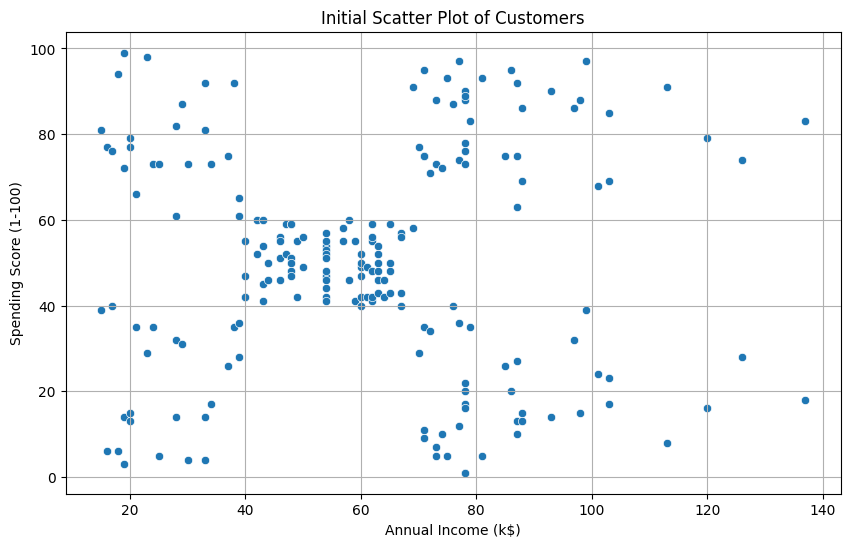

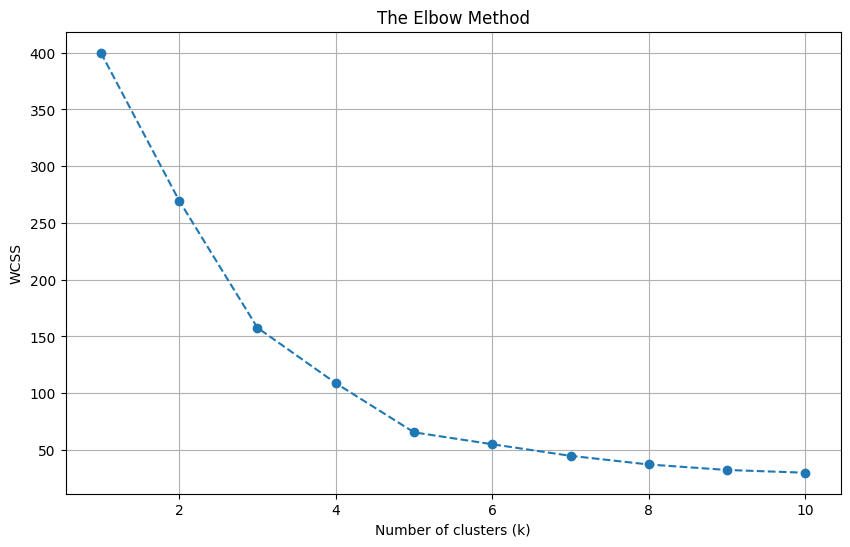

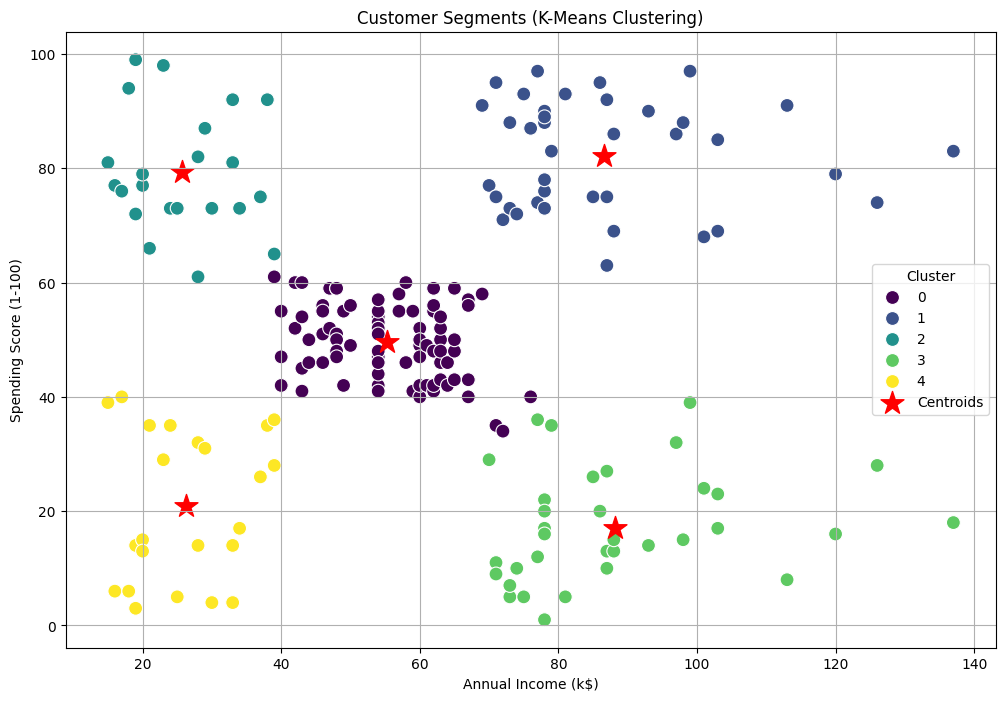

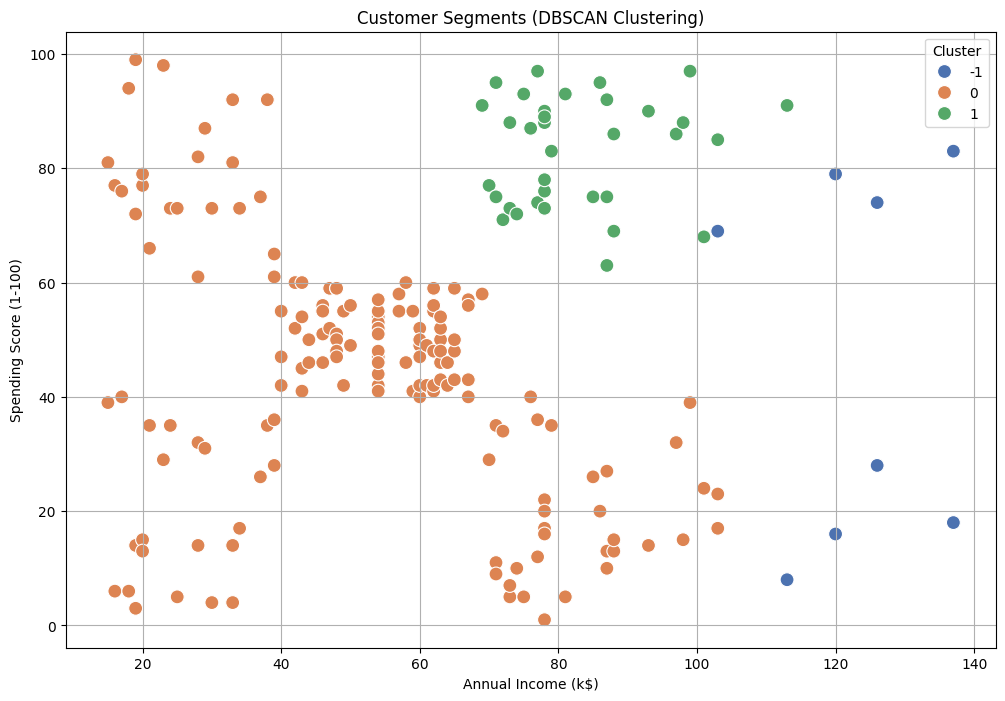

In [31]:
# Visual Exploration of Groupings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Initial Scatter Plot of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


#Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


#Visualize the K-Means clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis', s=100, legend='full')


# Plot the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='*', label='Centroids')

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Visualize DBSCAN clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='deep', s=100, legend='full')
plt.title('Customer Segments (DBSCAN Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [32]:
# A value of -1 in DBSCAN indicates a noise point (outlier).
num_outliers = (df['DBSCAN_Cluster'] == -1).sum()
print(f"DBSCAN found {df['DBSCAN_Cluster'].max() + 1} clusters and {num_outliers} outliers.\n")


#  Bonus Task 2: Analyze Spending per Cluster (K-Means)
print("Analysis of Segments (Average Income & Spending) ")

# Group by the cluster and calculate the mean for the relevant columns
cluster_analysis = df.groupby('KMeans_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean().round(2)
print(cluster_analysis)
print("\nThis table shows the characteristics of each customer segment.")

DBSCAN found 2 clusters and 8 outliers.

Analysis of Segments (Average Income & Spending) 
                Annual Income (k$)  Spending Score (1-100)    Age
KMeans_Cluster                                                   
0                            55.30                   49.52  42.72
1                            86.54                   82.13  32.69
2                            25.73                   79.36  25.27
3                            88.20                   17.11  41.11
4                            26.30                   20.91  45.22

This table shows the characteristics of each customer segment.
